In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import sys
from pathlib import Path
import os
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
#Data constants
shapes_B = [2, 4]#[2, 2]
scales_B = [3, 3]
k_B = len(scales_B) # Number of classes
d_B = 2 # Number of dimensions
p_c_B = [1/len(shapes_B)]*len(shapes_B) # Uniform distributon over classes
tag_B = f'k_{k_B}_d{d_B}_shapes{shapes_B}_scales{scales_B}_pc{p_c_B}'.replace(" ", "")

shapes_A = [2, 6]#[2, 2]
scales_A = [5, 3]
k_A = len(scales_A) # Number of classes
d_A = 2 # Number of dimensions
p_c_A = [1/len(shapes_A)]*len(shapes_A) # Uniform distributon over classes
tag_A = f'k_{k_A}_d{d_A}_shapes{shapes_A}_scales{scales_A}_pc{p_c_A}'.replace(" ", "")

In [109]:
def plot_hyperparams(dfs, model_names, hyperparams, metric_key, ymin=0, ymax=1):

    for j in range(len(model_names)):
        fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(7, 2),  layout="constrained")
        df = dfs[j]
        i = 0
        for value in hyperparams["lr"]:
            df_subset = df[df["lr"] == value]
            sn.barplot(df_subset, x="layers", y=metric_key, hue="weight_decay", ax=axs[i])
            axs[i].set_title(f"lr = {value}")
            axs[i].set_ylim(ymin, ymax)
            i = i + 1
        handles, labels = axs[0].get_legend_handles_labels()
        labels = [f"wd={item}" for item in labels]
        fig.suptitle(model_names[j], x=0.1, va="top", fontsize=16)
        #fig.text(x=0, y=1, s=model_names[j], fontsize=12)
        fig.legend(handles, labels, loc='upper right', ncol=4, labelspacing=0.1, fontsize=10)
        for ax in axs:
            ax.get_legend().remove()

In [65]:
def plot_model_hyperparams(dfs, model_names, hyperparams, model_hyperpam, model_hyperpam_values, metric_key, ymin=0, ymax=1):
    for j in range(len(model_names)):
        fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(7, 2),  layout="constrained")
        df = dfs[j]
        fig.suptitle(model_names[j])
        i = 0
        for value in model_hyperpam_values[j]:
            df_subset = df[df[model_hyperpam[j]] == value]
            if model_names[j] != "NNE":
                df_subset = df_subset[df_subset["lr"] == 0.001]
                axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
            else:
                axs[i].set_title(f"{model_hyperpam[j]} = {value}")
            sn.barplot(df_subset, x="layers", y=metric_key, hue="weight_decay", ax=axs[i])
            axs[i].set_ylim(ymin, ymax)

            if i != 0:
                axs[i].get_legend().remove()
            axs[i].set_ylabel("Mean UQ validation set")
            i = i + 1
        axs[0].legend(loc="lower left")

In [6]:
def load_df(folder_path, n_runs):
    filenames = [f"{folder_path}/results_run{i}.csv" for i in range(n_runs)]
    df = pd.concat((pd.read_csv(f) for f in filenames), ignore_index=True)
    return df

model_names = ["NNE", 
               "CL",
               "EDL",
               "MCD"]

folder_names = ["ensemble", "CL", "evidential", "MCD"]
folder_paths_A = [f"DNN/gridsearch/train_n_50000_{tag_A}/{folder}" for folder in folder_names]
n_models = len(model_names)
n_runs = [1, 1, 5, 5]

dfs_A = [load_df(folder_paths_A[i], n_runs[i]) for i in range(n_models)]

In [76]:
hyperparams = {
        "lr" : [0.01, 0.001, 0.0001],
        "weight_decay" : [0.1, 0.01, 0.001],
        "layers" : [1, 3, 8]
    }
metric_keys = ["ACC", "LogLoss", "Mean KL-div", "WD", "Mean UQ", "Std UQ",
                    "Mean Pc1 OOD", "Std Pc1 OOD",
                    "Mean UQ OOD", "Std UQ OOD"]

model_hyperpam = ["lr",
                  "bias_weight",
                  "annealing_coef",
                  "p_dropout"
                  ]
model_hyperpam_values = [[0.01, 0.001, 0.0001],
                         [0.5, 0.2, 0.1],
                         [0.01, 0.1, 1],
                         [0.2, 0.3, 0.5]
                        ]


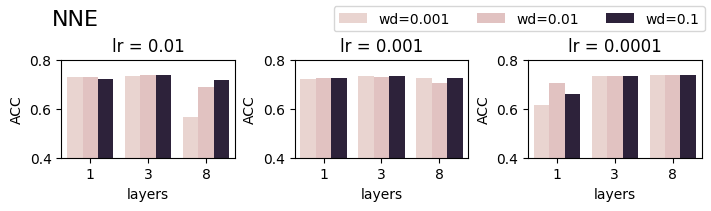

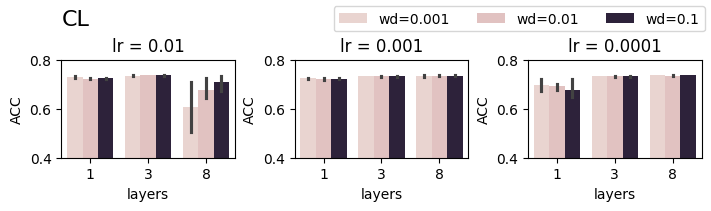

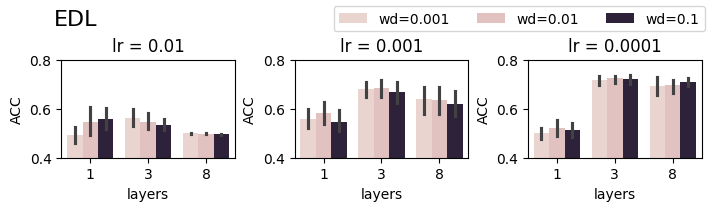

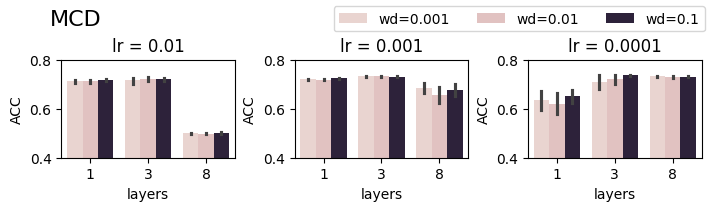

In [110]:
plot_hyperparams(dfs_A, model_names, hyperparams, "ACC", ymin=0.4, ymax=0.8)

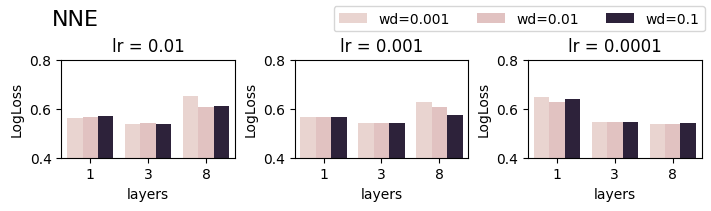

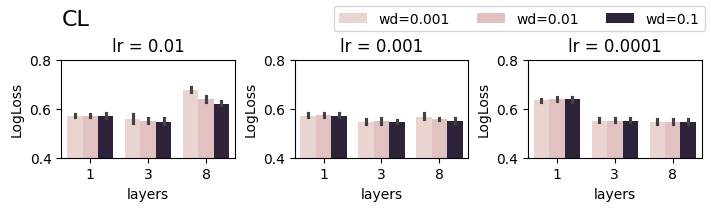

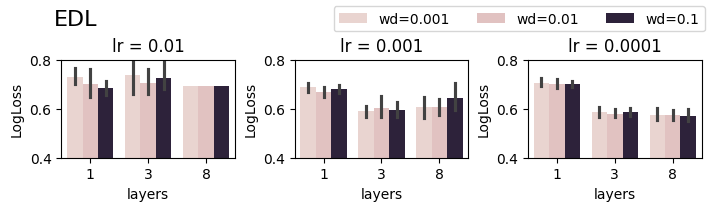

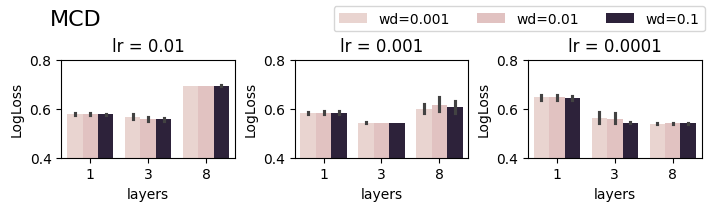

In [111]:
plot_hyperparams(dfs_A, model_names, hyperparams, "LogLoss", ymin=0.4, ymax=0.8)

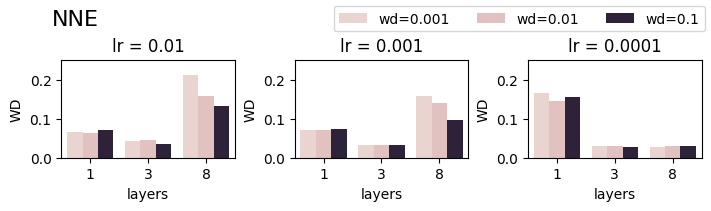

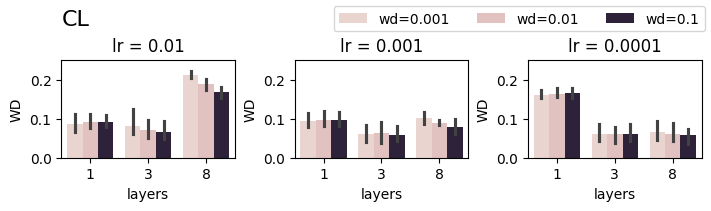

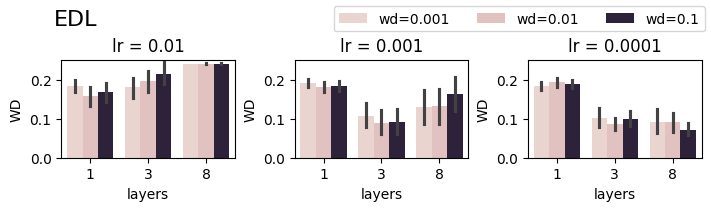

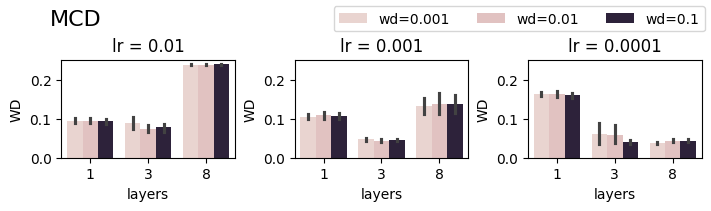

In [112]:
plot_hyperparams(dfs_A, model_names, hyperparams, "WD", ymin=0, ymax=0.25)

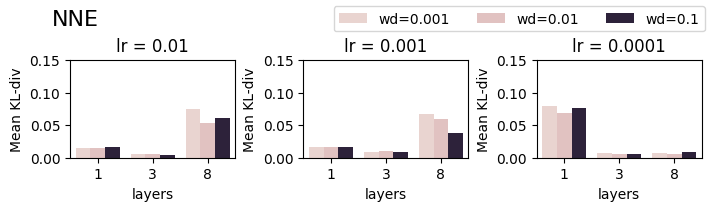

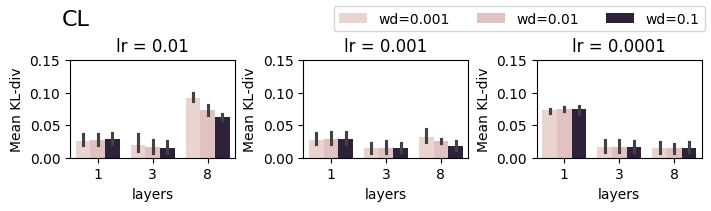

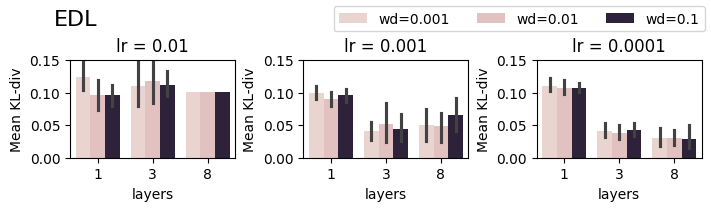

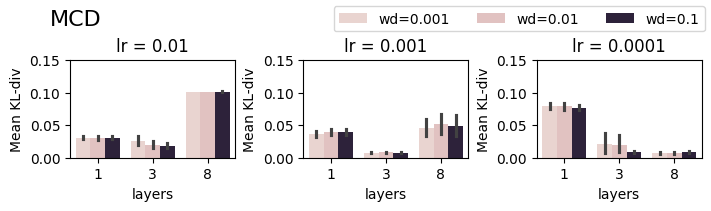

In [113]:
plot_hyperparams(dfs_A, model_names, hyperparams, "Mean KL-div", ymin=0, ymax=0.15)


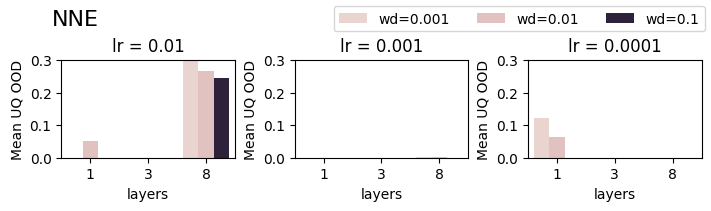

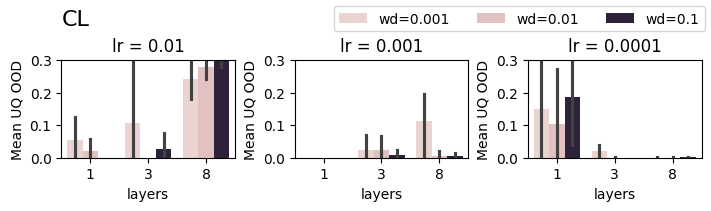

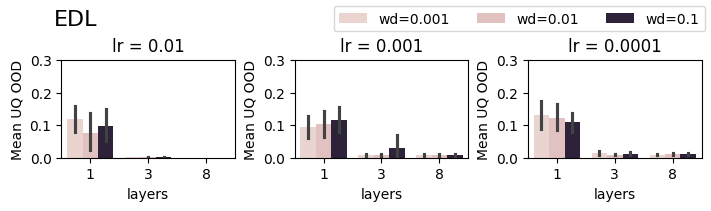

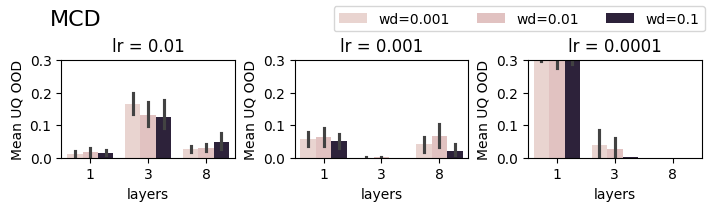

In [114]:
plot_hyperparams(dfs_A, model_names, hyperparams, "Mean UQ OOD", ymin=0, ymax=0.3)


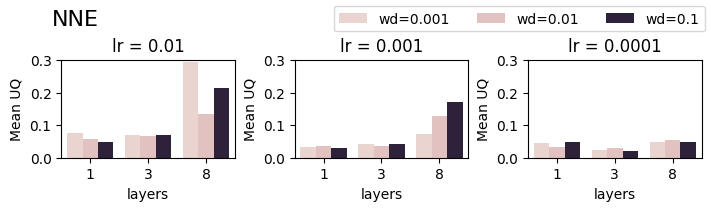

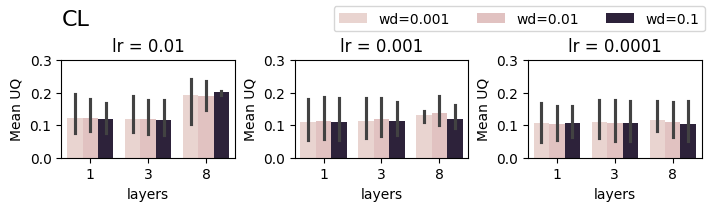

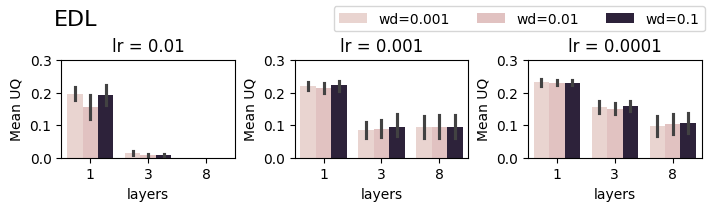

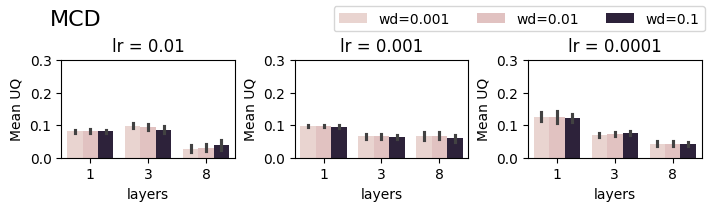

In [115]:
plot_hyperparams(dfs_A, model_names, hyperparams, "Mean UQ", ymin=0, ymax=0.3)


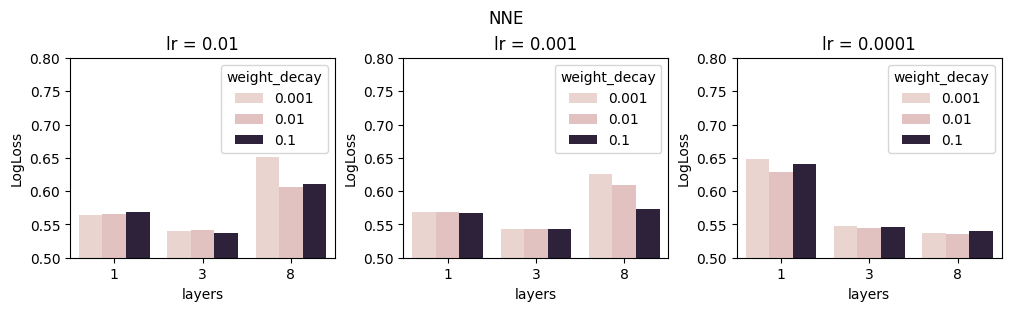

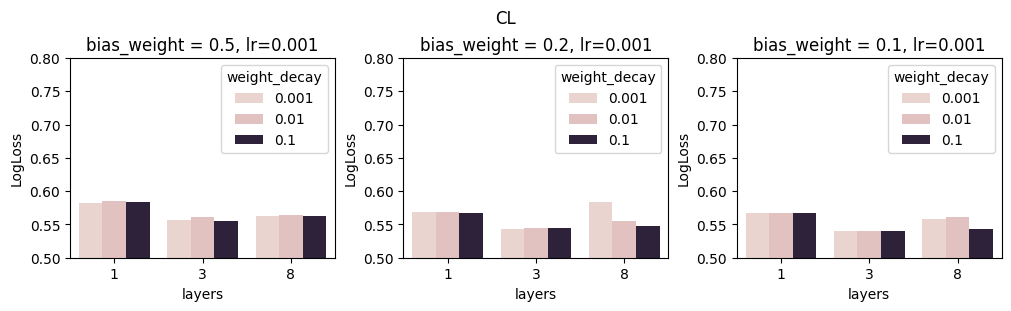

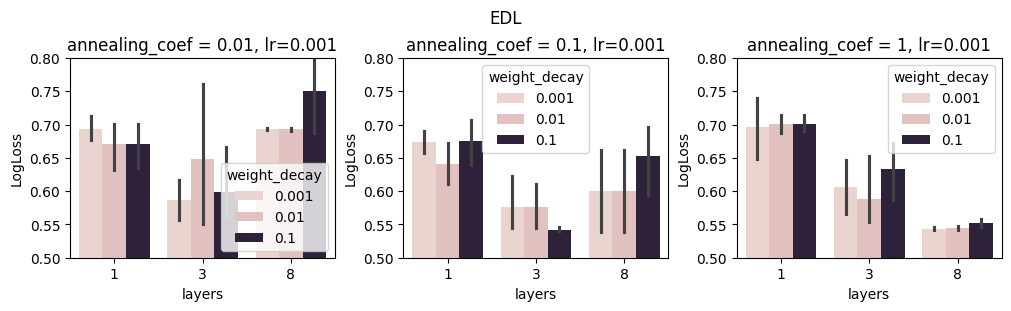

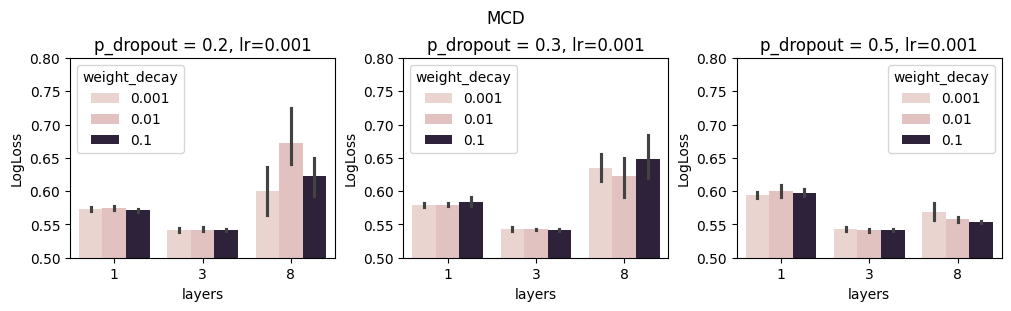

In [41]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
            axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        else:
            axs[i].set_title(f"{model_hyperpam[j]} = {value}")
        sn.barplot(df_subset, x="layers", y="LogLoss", hue="weight_decay", ax=axs[i])
        axs[i].set_ylim(0.5, 0.8)

        if i != 0:
            axs[i].get_legend().remove()
        axs[0].legend(loc="lower left")
        i = i + 1

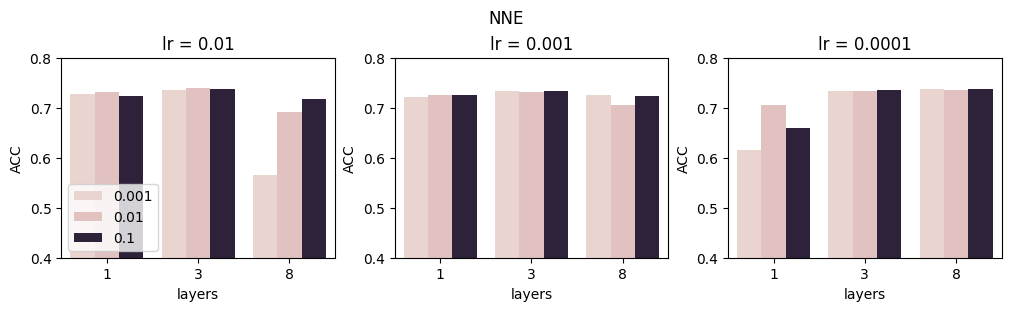

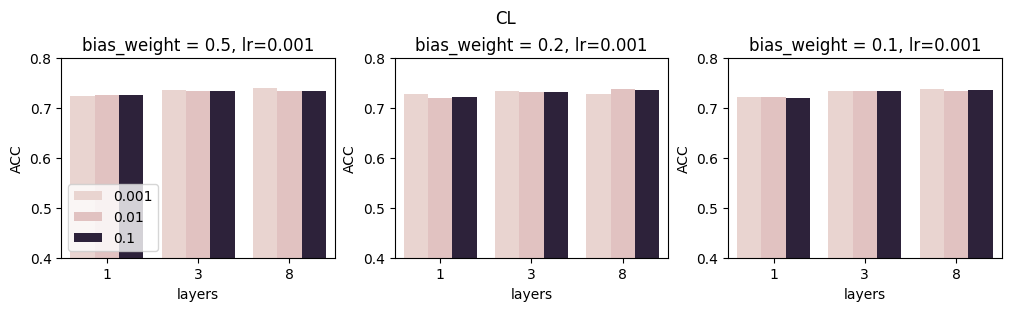

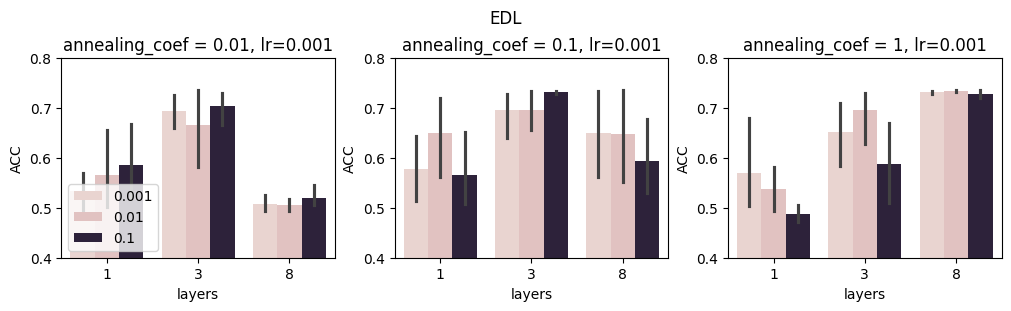

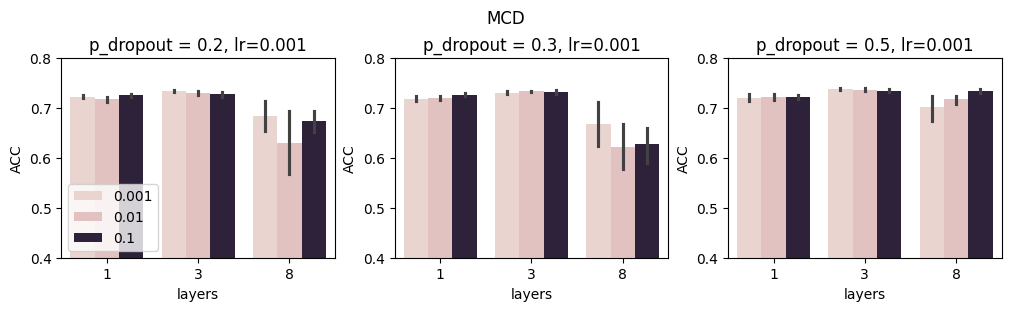

In [49]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
            axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        else:
            axs[i].set_title(f"{model_hyperpam[j]} = {value}")
        sn.barplot(df_subset, x="layers", y="ACC", hue="weight_decay", ax=axs[i])
        axs[i].set_ylim(0.4, 0.8)

        if i != 0:
            axs[i].get_legend().remove()
        axs[0].legend(loc="lower left")
        i = i + 1

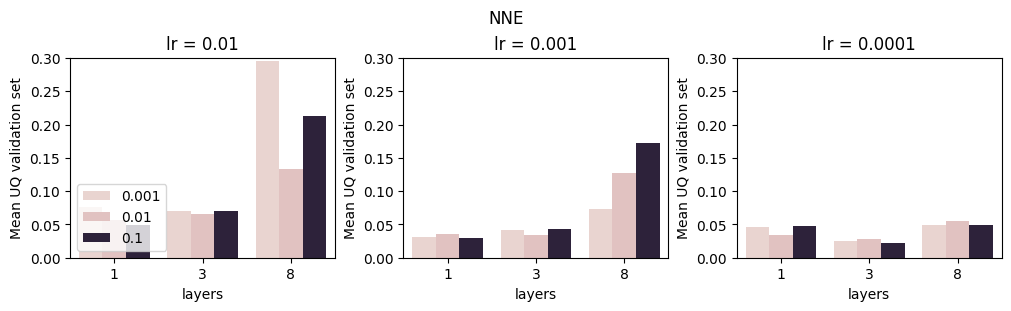

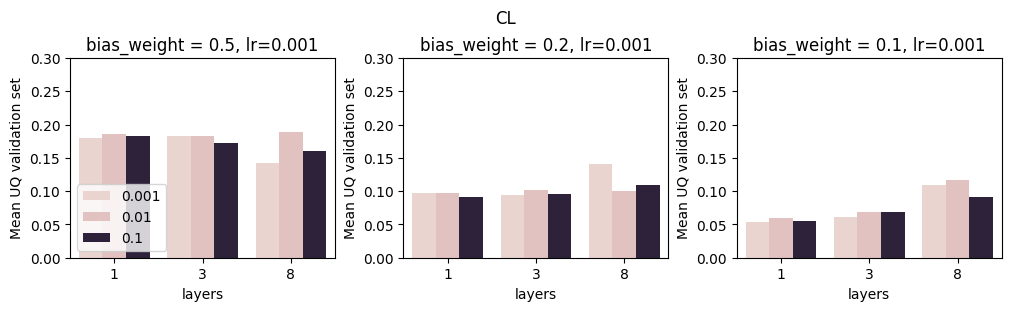

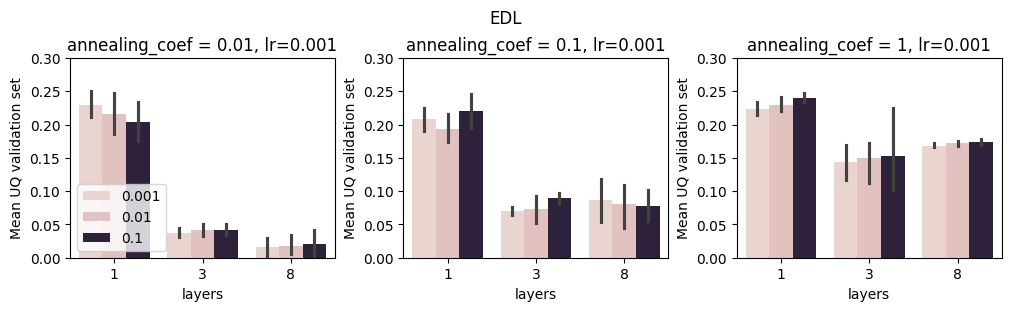

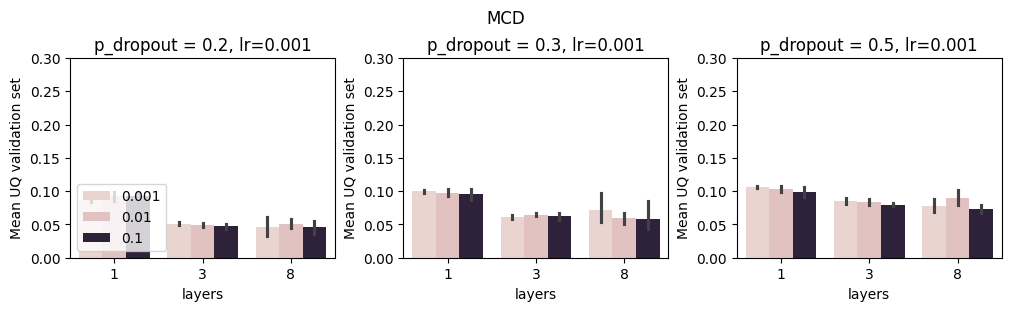

In [50]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
            axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        else:
            axs[i].set_title(f"{model_hyperpam[j]} = {value}")
        sn.barplot(df_subset, x="layers", y="Mean UQ", hue="weight_decay", ax=axs[i])
        axs[i].set_ylim(0, 0.3)

        if i != 0:
            axs[i].get_legend().remove()
        axs[i].set_ylabel("Mean UQ validation set")
        i = i + 1
    axs[0].legend(loc="lower left")

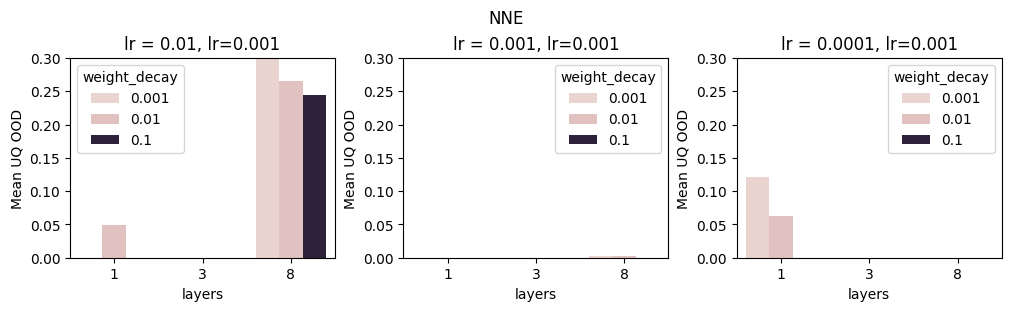

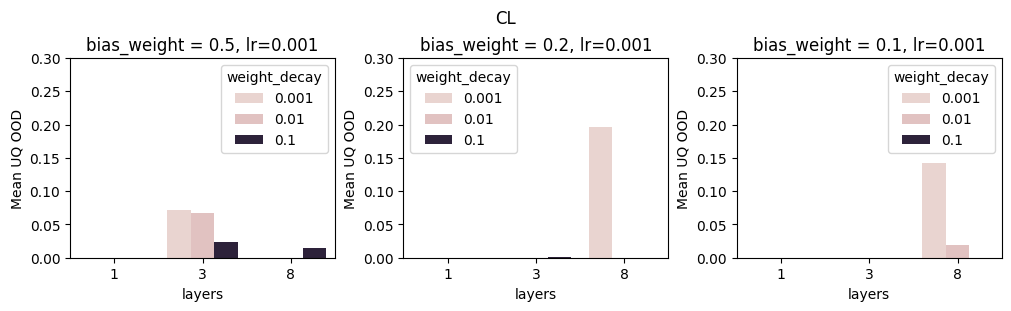

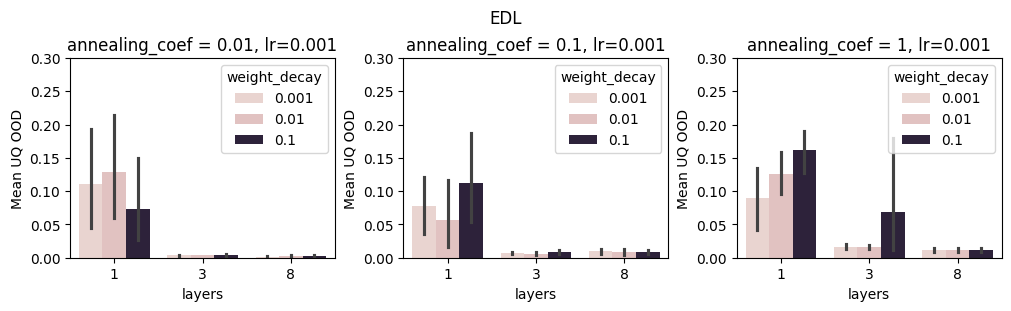

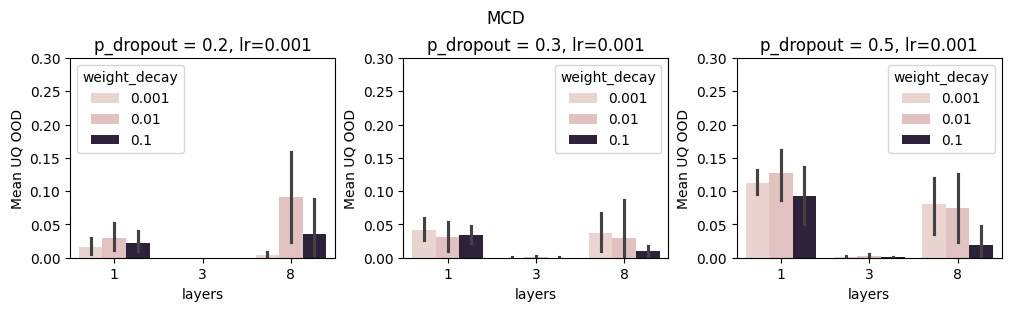

In [44]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
        sn.barplot(df_subset, x="layers", y="Mean UQ OOD", hue="weight_decay", ax=axs[i])
        axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        axs[i].set_ylim(0, 0.3)
        axs[i].set_ylabel("Mean UQ OOD")
        i = i + 1

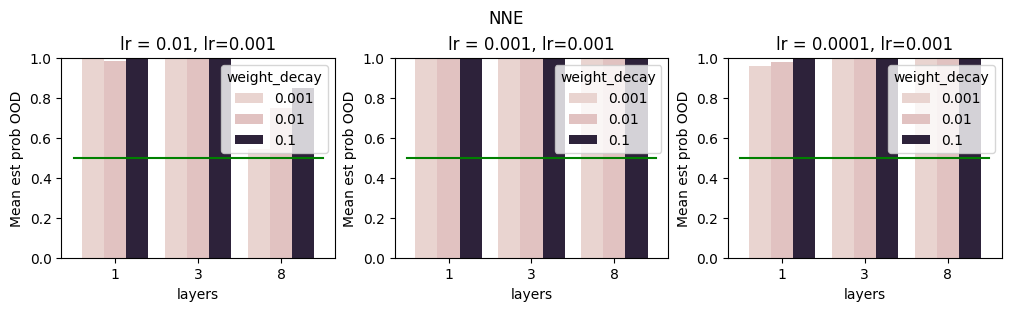

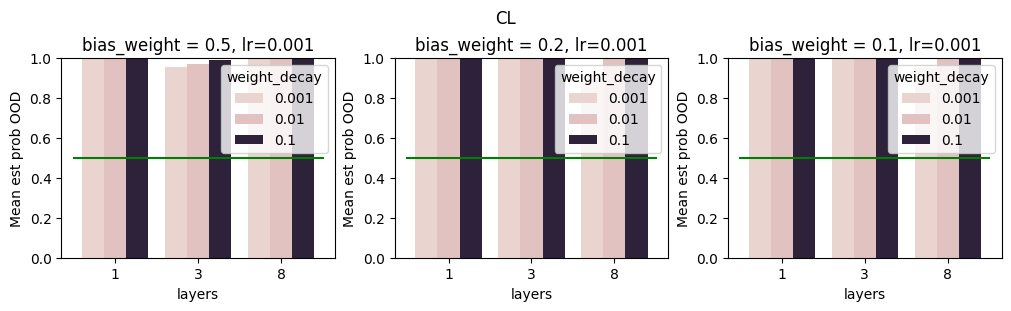

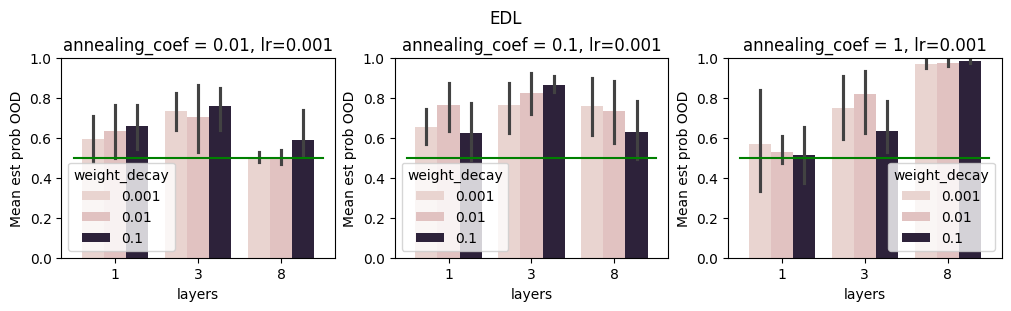

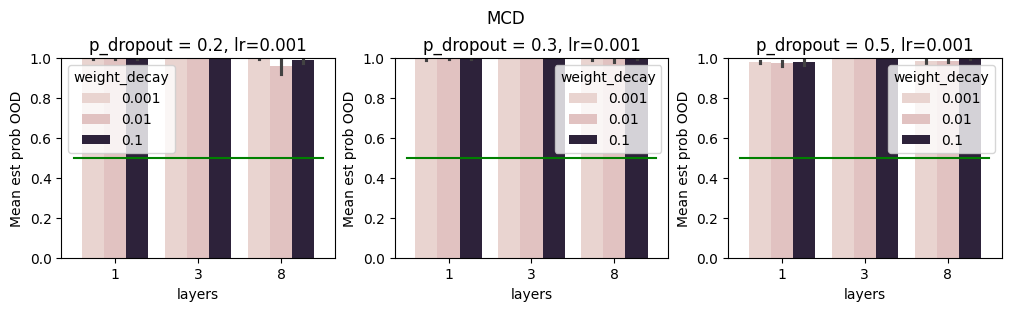

In [45]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
        sn.barplot(df_subset, x="layers", y="Mean Pc1 OOD", hue="weight_decay", ax=axs[i])
        axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        axs[i].set_ylim(0, 1)
        x = [-0.5, 1, 2.5]
        y = [0.5, 0.5, 0.5]
        axs[i].plot(x, y, c="green", label=f"p=0.5")
        axs[i].set_ylabel("Mean est prob OOD")
        i = i + 1

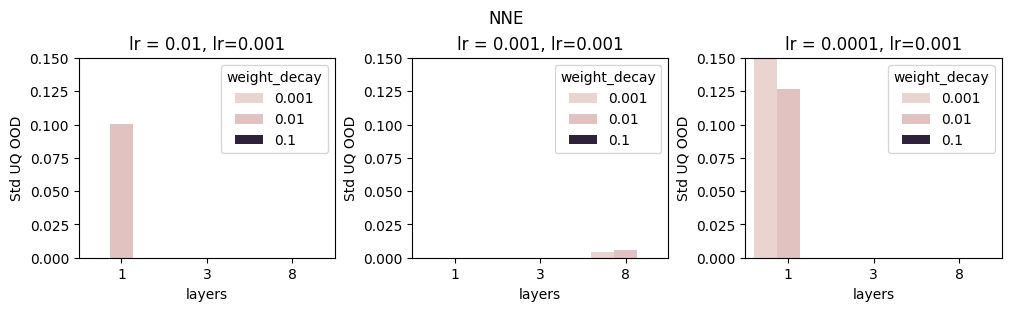

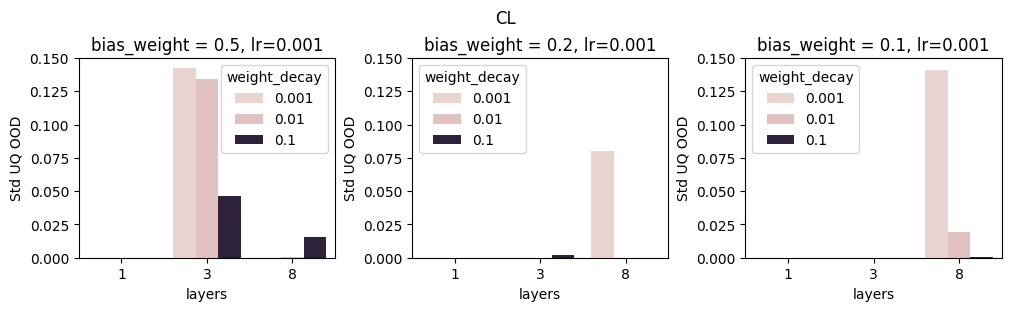

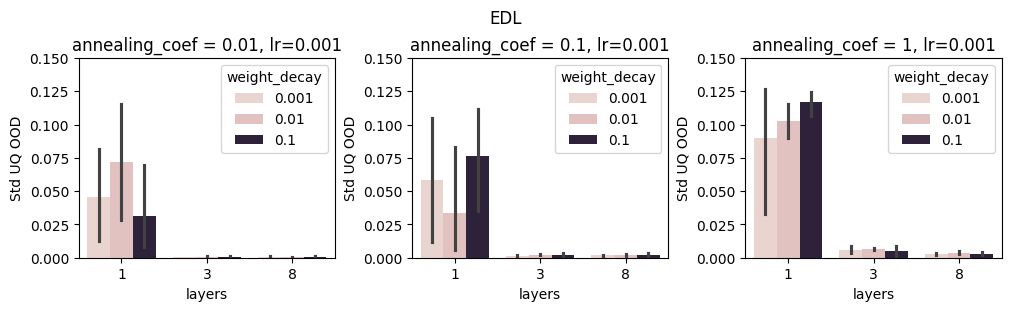

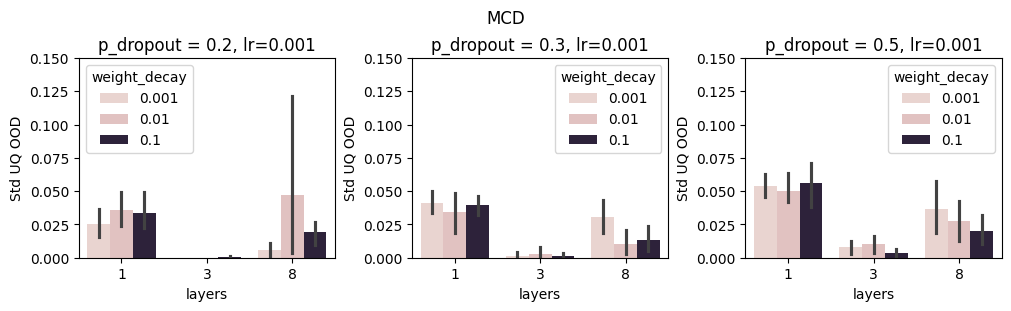

In [46]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
        sn.barplot(df_subset, x="layers", y="Std UQ OOD", hue="weight_decay", ax=axs[i])
        axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        axs[i].set_ylim(0, 0.15)
        axs[i].set_ylabel("Std UQ OOD")
        i = i + 1

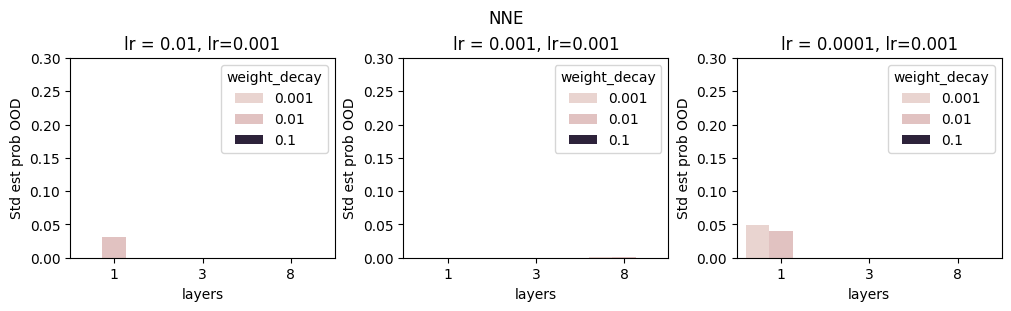

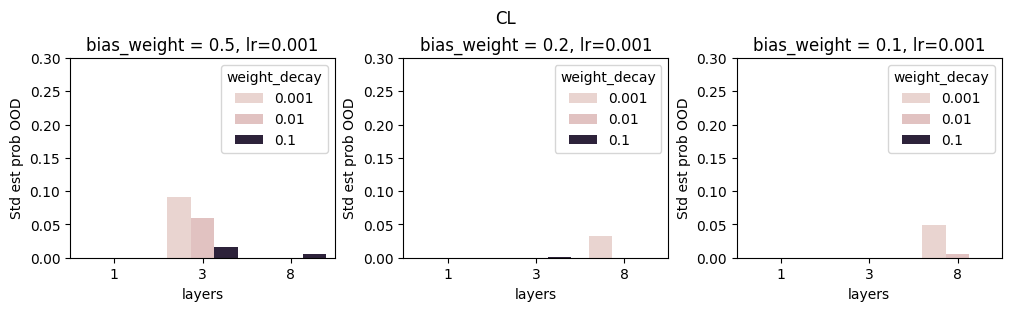

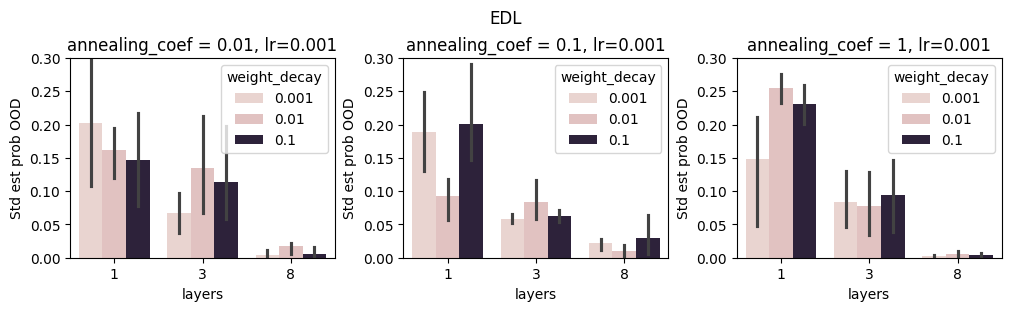

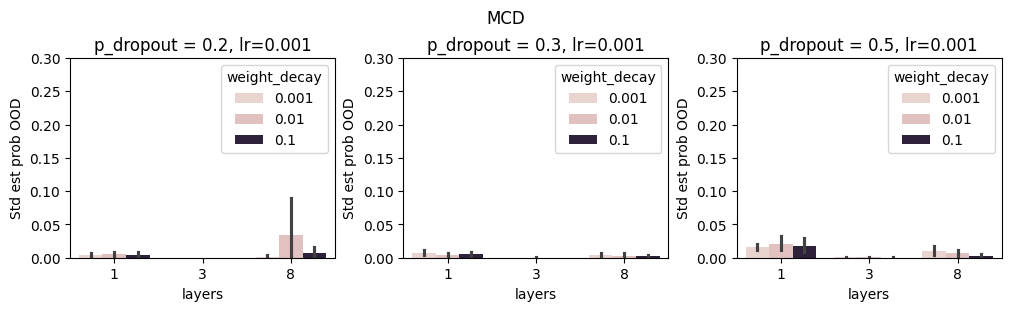

In [47]:
for j in range(len(model_names)):
    fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 3),  layout="constrained")
    df = dfs_A[j]
    fig.suptitle(model_names[j])
    i = 0
    for value in model_hyperpam_values[j]:
        df_subset = df[df[model_hyperpam[j]] == value]
        if model_names[j] != "NNE":
            df_subset = df_subset[df_subset["lr"] == 0.001]
        sn.barplot(df_subset, x="layers", y="Std Pc1 OOD", hue="weight_decay", ax=axs[i])
        axs[i].set_title(f"{model_hyperpam[j]} = {value}, lr=0.001")
        axs[i].set_ylim(0, 0.3)
        axs[i].set_ylabel("Std est prob OOD")
        i = i + 1